In [77]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [78]:
# Constants
NUM_CLASSES = 8

In [79]:
# Load in the data
data = np.load('../data/segmentedPose.npy')
X = data[:,0:99]
y = data[:,99].astype(int)

# Convert y to categorical data
y = to_categorical(y, num_classes=NUM_CLASSES)

In [130]:
# Get training and test splits
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=67)

In [131]:
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(99,)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [132]:
# Compile the optimizer and model
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    # initial_learning_rate=0.0003,
    decay_steps=100,
    decay_rate=0.95
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [133]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16)
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=250, batch_size=32)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.2432 - loss: 2.0071 - precision: 0.4353 - recall: 0.0519 - val_accuracy: 0.3006 - val_loss: 1.9119 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5020 - loss: 1.3496 - precision: 0.7624 - recall: 0.2308 - val_accuracy: 0.4104 - val_loss: 1.8377 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6202 - loss: 1.1541 - precision: 0.8056 - recall: 0.3467 - val_accuracy: 0.4046 - val_loss: 1.7656 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6696 - loss: 1.0746 - precision: 0.8046 - recall: 0.3708 - val_accuracy: 0.4566 - val_loss: 1.6652 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6608 - loss: 0.9990 - precision: 0.8251 - recall: 0.4514 - val_acc

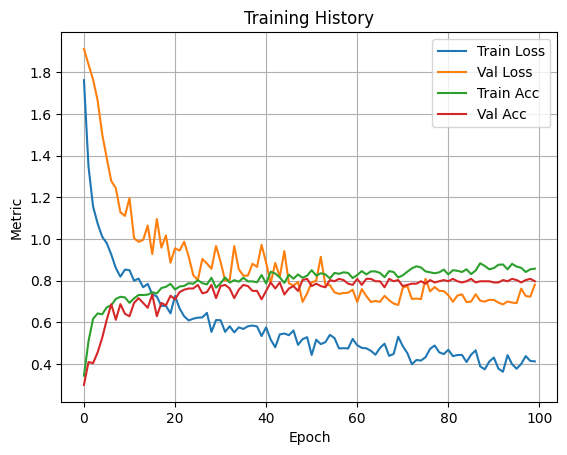

In [134]:
# Plot a training history graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
# plt.plot(history.history['precision'], label='Precision')
# plt.plot(history.history['recall'], label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.title('Training History')
plt.grid(True)
plt.show()